
# PCA to estimating DJI 


- Principal component analysis (PCA) is an unsupervised machine learning algorithm based on a well-established mathematical technique that data scientists use for visualization and complex data pre-processing in Exploratory Data Analysis  


- Dow Jones Industrial Average (^DJI) is a stock market index that measures the stock performance of 30 large companies listed on US stock exchanges.



In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr
import pandas_datareader.data as web
from sklearn.decomposition import KernelPCA


In [2]:
# Tickers list for the Dow Jones index and its 30 stocks 

tickers=["MMM","AXP","AMGN","AAPL","BA","CAT","CVX","CSCO","KO","DOW","GS","HD","HON","IBM","INTC","JNJ","JPM","MCD","MRK","MSFT","NKE","PG","CRM","TRV","UNH","VZ","V","WMT","WBA","DIS", "^DJI"]


In [3]:
def get_price(stock, start, end):
    return pdr.get_data_yahoo(stock, start, end)['Adj Close']

prices = pd.DataFrame({n: get_price(n, "2020-01-01", "2021-04-27") for n in tickers})


In [4]:
prices.tail()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,PG,CRM,TRV,UNH,VZ,V,WMT,WBA,DIS,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-21,200.880005,147.179993,258.779999,133.500000,235.919998,231.413940,102.730003,51.930000,54.610001,64.820000,...,135.980011,230.559998,157.380005,398.809998,58.139999,227.449997,141.199997,54.049999,183.110001,34137.308594
2021-04-22,200.899994,147.160004,255.050003,131.940002,234.330002,227.860001,100.949997,51.500000,54.439999,60.930000,...,134.630005,231.350006,155.869995,396.540009,57.279999,227.570007,139.669998,52.580002,182.759995,33815.898438
2021-04-23,202.199997,144.330002,257.029999,134.320007,238.380005,230.110001,101.550003,51.910000,54.470001,62.110001,...,133.940002,233.509995,157.839996,400.309998,57.299999,230.000000,139.899994,53.020000,183.020004,34043.488281
2021-04-26,199.630005,150.339996,255.520004,134.720001,241.440002,230.559998,101.519997,51.639999,53.660000,62.200001,...,131.259995,235.460007,155.729996,395.859985,56.939999,230.339996,137.910004,52.730000,184.270004,33981.570312
2021-04-27,194.449997,150.360001,255.130005,134.389999,242.470001,230.339996,102.699997,51.369999,53.580002,62.650002,...,131.179993,234.210007,155.199997,394.500000,56.320000,229.910004,138.380005,52.509998,184.639999,33984.929688


## PCA algorithm
    

Before using PCA: Standardize the dataset 

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#i.e., all 30 dimensions are centered around 0 and have a std=1
standardize= lambda x: (x-x.mean())/x.std()


In [6]:
pca = KernelPCA().fit(prices.apply(standardize))

Next calculate the covariance matrix for the resulting centered matrix and use eigenvalue decomposition to transform it 

Eigenvalues

In [7]:
#Eigenvalues in decreasing order

pca.lambdas_

array([6.45241214e+03, 1.78303259e+03, 7.60834901e+02, 4.67868191e+02,
       1.82225923e+02, 1.01304074e+02, 9.48954134e+01, 8.26835045e+01,
       6.39166194e+01, 4.12198632e+01, 3.75575647e+01, 3.14577664e+01,
       2.72704995e+01, 2.34435433e+01, 1.99130273e+01, 1.86015915e+01,
       1.17290047e+01, 1.09354280e+01, 8.89714797e+00, 8.09696602e+00,
       7.66718244e+00, 4.94968550e+00, 4.87014754e+00, 3.51987766e+00,
       2.73746443e+00, 2.48802758e+00, 2.04337413e+00, 1.74101370e+00,
       1.37460318e+00, 1.21233028e+00, 1.00541166e-01])

## Explained Variance

The first principal component alone accounts for about 63% percent of the variance in the 30 time series:

In [8]:
normalize= lambda x:x/x.sum()
normalize(pca.lambdas_)[:10]

array([0.62882878, 0.17376792, 0.07414822, 0.04559674, 0.01775908,
       0.00987273, 0.00924816, 0.00805804, 0.00622908, 0.00401714])

In [9]:
eig_vals = normalize(pca.lambdas_)[:10]
for i in eig_vals:
    print(i)

0.6288287824851365
0.1737679159339693
0.07414822154609832
0.0455967440990974
0.017759080343649793
0.009872729184840206
0.009248164255995131
0.008058035720136724
0.006229082876055716
0.004017138996892413


The first 10 principal components combined explain almost 97% of the variability:

In [10]:
tot = sum(eig_vals)
tot

0.9775258954418716

On the graph bellow (adopted from S.R.) it's easy to see that the first principal component alone accounts for more than 60% of the variance the 30 time series, and that the first 5 components explain most of the variability:

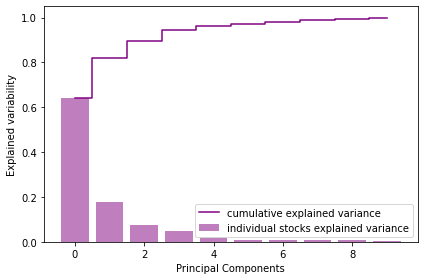

In [11]:
var = [(i/tot) for i in eig_vals]
cum = np.cumsum(var)

plt.bar(range(10), var, alpha=0.5, align='center', color = 'purple', label='individual stocks explained variance')
plt.step(range(10), cum, where='mid', color = 'purple', label='cumulative explained variance')
plt.ylabel('Explained variability')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()


In [12]:
pca = KernelPCA(n_components=5).fit(prices.apply(standardize))
PC5 = pca.transform(-prices)
weights =normalize(pca.lambdas_)
prices['PCA_5'] = np.dot(PC5, weights)

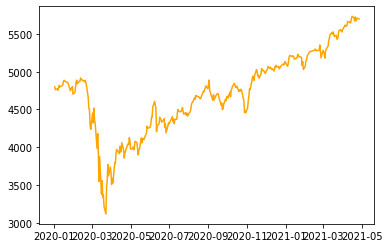

In [13]:
plt.plot(prices['PCA_5'], color='orange')

In [14]:
#The Dow 
prices['^DJI']

Date
2020-01-02    28868.800781
2020-01-03    28634.880859
2020-01-06    28703.380859
2020-01-07    28583.679688
2020-01-08    28745.089844
                  ...     
2021-04-21    34137.308594
2021-04-22    33815.898438
2021-04-23    34043.488281
2021-04-26    33981.570312
2021-04-27    33984.929688
Name: ^DJI, Length: 332, dtype: float64

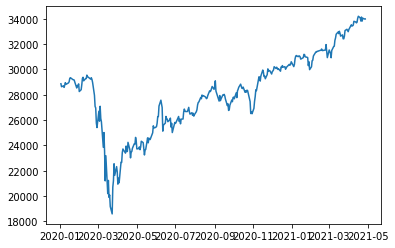

In [15]:
plt.plot(prices['^DJI'])

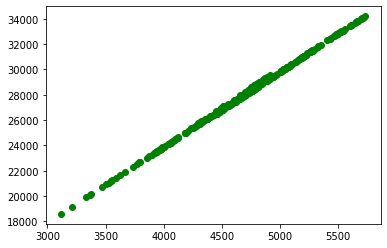

In [16]:
#Relationship btw Dow Jones & PCA index
plt.scatter(prices['PCA_5'],prices['^DJI'], color ='g')